<a href="https://colab.research.google.com/github/Takaros96/Predict-Career-Longevity-for-NBA-Rookies-using-Scikit-learn/blob/main/Coursera_guided_projects_Predict_Career_Longevity_for_NBA_Rookies_using_Scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np#CALCULATE mean and standard deviation
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
import sklearn.metrics as metrics
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from IPython.display import Image#library to import image
from sklearn.metrics import confusion_matrix
from yellowbrick.classifier import ROCAUC#Discrimination threshold

In [ ]:
df=pd.read_csv('nba_logreg.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1340 non-null   object 
 1   GP           1340 non-null   int64  
 2   MIN          1340 non-null   float64
 3   PTS          1340 non-null   float64
 4   FGM          1340 non-null   float64
 5   FGA          1340 non-null   float64
 6   FG%          1340 non-null   float64
 7   3P Made      1340 non-null   float64
 8   3PA          1340 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1340 non-null   float64
 11  FTA          1340 non-null   float64
 12  FT%          1340 non-null   float64
 13  OREB         1340 non-null   float64
 14  DREB         1340 non-null   float64
 15  REB          1340 non-null   float64
 16  AST          1340 non-null   float64
 17  STL          1340 non-null   float64
 18  BLK          1340 non-null   float64
 19  TOV   

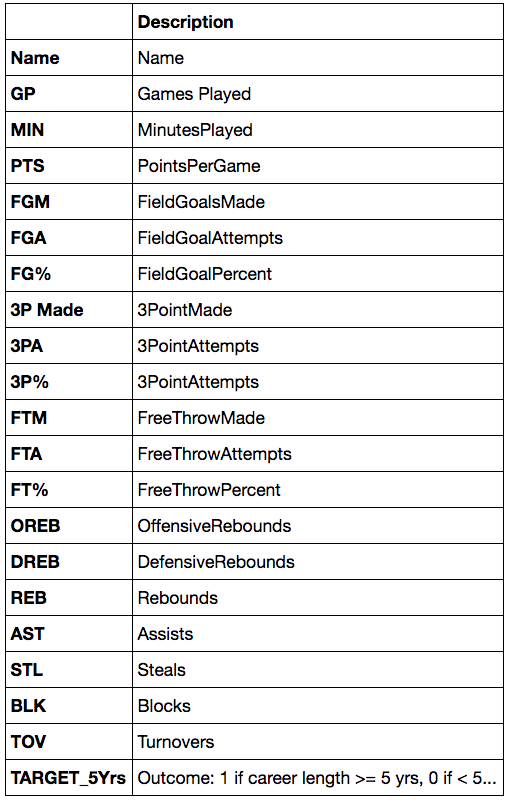

In [ ]:
#import the description table
Image(filename='table.png',width=400,height=500)

In [ ]:
df['TARGET_5Yrs'].value_counts()

1.0    831
0.0    509
Name: TARGET_5Yrs, dtype: int64

In [ ]:
df=df.dropna()

In [ ]:
Average_stats=df.groupby(['TARGET_5Yrs']).mean()

<ipython-input-7-9a8c30974244>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Average_stats=df.groupby(['TARGET_5Yrs']).mean()


In [ ]:
Average_stats

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
TARGET_5Yrs,,,,,,,,,,,,,,,,,,,
0.0,51.495030,14.276740,5.060636,1.951093,4.562425,42.270775,0.232406,0.763618,19.378131,0.928231,1.324254,69.122266,0.713519,1.522863,2.234592,1.230815,0.500000,0.249901,0.944732
1.0,65.826877,19.700847,7.891646,3.051090,6.718523,45.242131,0.260169,0.799031,19.265496,1.530872,2.133656,71.189588,1.186683,2.325061,3.511864,1.758838,0.693705,0.436925,1.349031


In [ ]:
df_transposed=Average_stats.T

In [ ]:
df_transposed

TARGET_5Yrs,0.0,1.0
GP,51.495030,65.826877
MIN,14.276740,19.700847
PTS,5.060636,7.891646
FGM,1.951093,3.051090
FGA,4.562425,6.718523
FG%,42.270775,45.242131
3P Made,0.232406,0.260169
3PA,0.763618,0.799031
3P%,19.378131,19.265496
FTM,0.928231,1.530872


<ipython-input-13-028ed7ca1063>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Text(0.5, 1.0, 'features values by label')

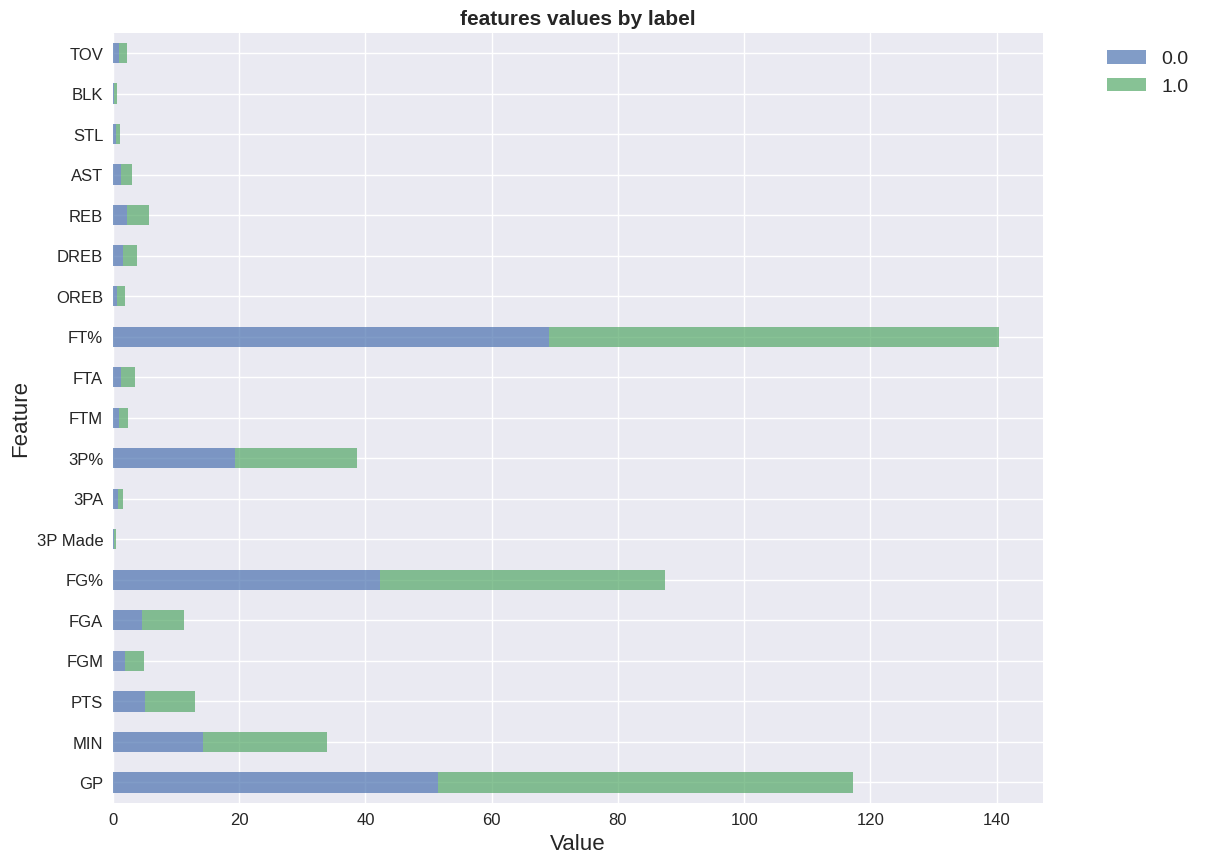

In [ ]:
#visualize the data for insights
table=df_transposed
plt.style.use('seaborn')
ax=table.plot(stacked=True,kind='barh',figsize=(12,10),alpha=0.7)

#decorating the plot
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left',prop={'size':14})
plt.xlabel('Value',fontsize=16)
plt.ylabel('Feature',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('features values by label',fontsize=15,weight='bold')

In [ ]:
X=df.iloc[:,1:-1]#choose all the columns except the first and the last
Y=df.iloc[:,-1]

<Axes: >

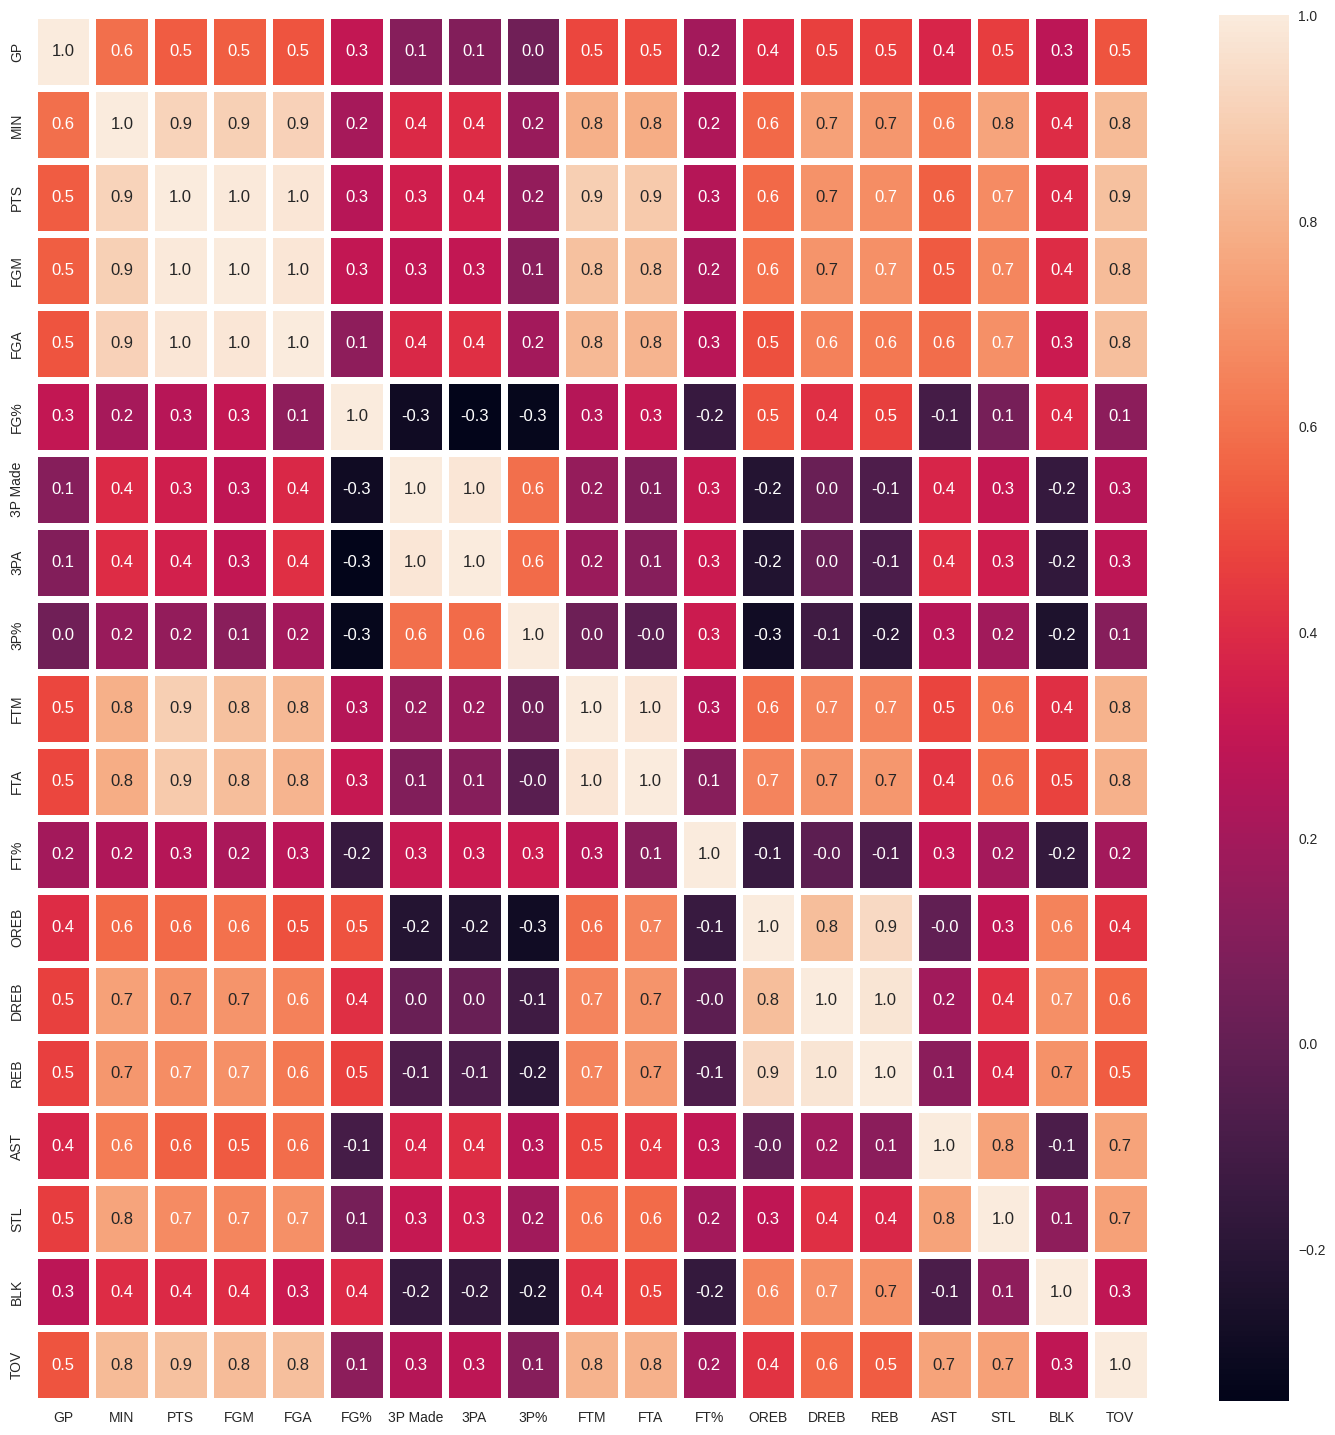

In [ ]:
f,ax=plt.subplots(figsize=(18,18))
sns.heatmap(X.corr(),annot=True,linewidths=5,fmt='.1f',ax=ax)

In [ ]:
X=X.drop(['FGA','FGM','3PA','FTM','DREB'],axis=1)#Drop correlated features

In [ ]:
X

,GP,MIN,PTS,FG%,3P Made,3P%,FTA,FT%,OREB,REB,AST,STL,BLK,TOV
0,36,27.4,7.4,34.7,0.5,25.0,2.3,69.9,0.7,4.1,1.9,0.4,0.4,1.3
1,35,26.9,7.2,29.6,0.7,23.5,3.4,76.5,0.5,2.4,3.7,1.1,0.5,1.6
2,74,15.3,5.2,42.2,0.4,24.4,1.3,67.0,0.5,2.2,1.0,0.5,0.3,1.0
3,58,11.6,5.7,42.6,0.1,22.6,1.3,68.9,1.0,1.9,0.8,0.6,0.1,1.0
4,48,11.5,4.5,52.4,0.0,0.0,1.9,67.4,1.0,2.5,0.3,0.3,0.4,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,80,15.8,4.3,43.3,0.0,14.3,1.5,79.2,0.4,1.2,2.5,0.6,0.2,0.8
1336,68,12.6,3.9,35.8,0.1,16.7,1.0,79.4,0.4,1.5,2.3,0.8,0.0,1.3
1337,43,12.1,5.4,55.0,0.0,0.0,1.6,64.3,1.5,3.8,0.3,0.3,0.4,0.9
1338,52,12.0,4.5,43.9,0.0,10.0,1.8,62.5,0.2,0.7,2.2,0.4,0.1,0.8


In [ ]:
#ml classification algorithms are used to predict the probability of a categorical
#variable.in logistic regression the categorical dependent variable is a binary variable
#that contains data coded a one for yes or zero for no
#it computes the probability of our target being equal to one

X_train,X_test,y_train,y_test=train_test_split(X,Y,stratify=Y,random_state=42)#we want to keep
#the proportion of y values in the test and train sets the same.
#this is related to the class imbalance issue

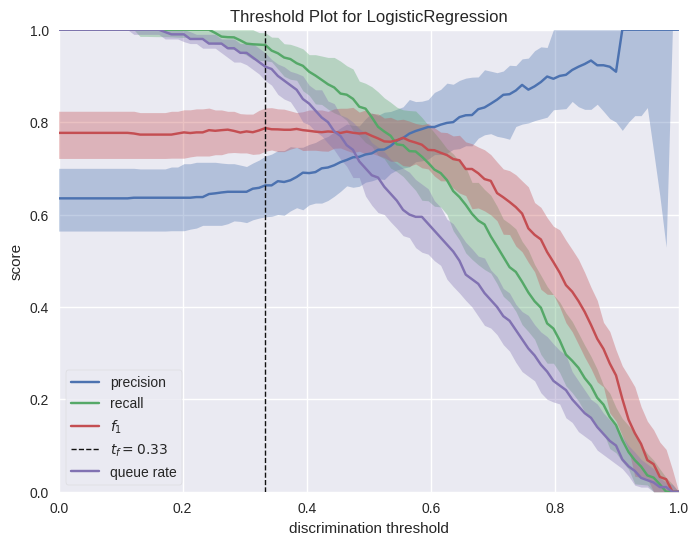

<Axes: title={'center': 'Threshold Plot for LogisticRegression'}, xlabel='discrimination threshold', ylabel='score'>

In [ ]:
#discrimination threshold plot
from yellowbrick.base import Visualizer
from yellowbrick.classifier import DiscriminationThreshold
warnings.filterwarnings('ignore')
Visualizer=DiscriminationThreshold(LogisticRegression(),size=(800,600))
Visualizer.fit(X_train,y_train)
Visualizer.poof()

In [ ]:
#fit the logitic regression
clf=LogisticRegression().fit(X_train,y_train)
#labels prediction
y_pred=np.where(clf.predict_proba(X_test)[:,1]>0.35,1,0)

In [ ]:
#tranform y_pred array to dataframe
y_pred=pd.DataFrame(y_pred)

In [ ]:
y_pred

,0
0,1
1,1
2,1
3,1
4,1
...,...
328,1
329,1
330,1
331,1


In [ ]:
#F1_Score
metrics.f1_score(y_test,y_pred)#the maximum f1 score we can get

0.7911646586345382

In [ ]:
tn,fp,fn,tp=confusion_matrix(y_test,y_pred).ravel()

In [ ]:
tn


32

In [ ]:
fp

94

In [ ]:
fn

10

In [ ]:
tp

197

In [ ]:
#test_accuracy
test_accuracy=metrics.accuracy_score(y_test,y_pred)
test_accuracy

0.6876876876876877

In [ ]:
#precision score
precision_score=metrics.precision_score(y_test,y_pred)
precision_score

0.6769759450171822

In [ ]:
#recall  score
recall_score=metrics.precision_score(y_test,y_pred)
recall_score

0.6769759450171822